**Uttara Bahad Assignment ETG Internship**

**Summer Olympics Data Analysis Assignment**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("summer.csv")

In [3]:
df.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

**1.In how many cities Summer Olympics is held so far?**

In [5]:
df['City']
print("Number of cities in which the Summer Olympics is held:") 
len(df['City'].unique())

Number of cities in which the Summer Olympics is held:


22

**2. Which sport is having most number of Gold Medals so far? (Top 5)**

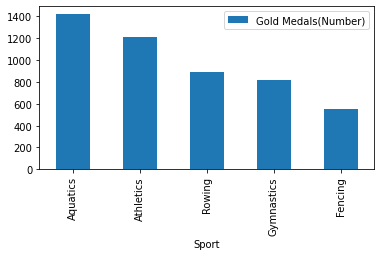

In [9]:
data = []
for Sport in df['Sport'].unique():
    data.append([Sport, len(df.loc[(df['Medal']=='Gold') & (df['Sport']==Sport)])])
pd.DataFrame(data,columns=['Sport','Gold Medals(Number)']).sort_values(by='Gold Medals(Number)', ascending=False).head().plot.bar(x='Sport',y='Gold Medals(Number)',figsize=(6,3))

**3. Which sport is having most number of medals so far? (Top 5)**

In [10]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

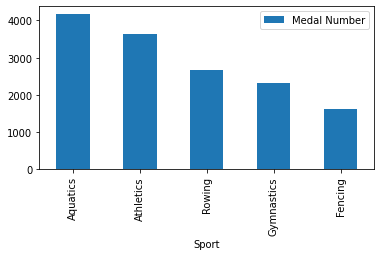

In [12]:
data=[]
for Sport in df['Sport'].unique():
    data.append([Sport,len(df[df['Sport']==Sport])])
pd.DataFrame(data,columns=['Sport','Medal Number']).sort_values(by='Medal Number',ascending=False).head().plot.bar(x='Sport',y='Medal Number',figsize=(6,3))

**4. Which player has won most number of medals? (Top 5)**

In [13]:
df.groupby('Athlete').size().sort_values(ascending=False).head(),['Medal']

(Athlete
 PHELPS, Michael         22
 LATYNINA, Larisa        18
 ANDRIANOV, Nikolay      15
 MANGIAROTTI, Edoardo    13
 SHAKHLIN, Boris         13
 dtype: int64, ['Medal'])

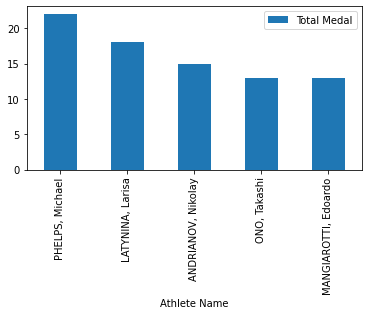

In [14]:
data = []
for Athlete in df['Athlete'].unique():
    data.append([Athlete,len(df[df['Athlete']==Athlete])])
pd.DataFrame(data,columns=['Athlete Name','Total Medal']).sort_values(by='Total Medal',ascending=False).head().plot.bar(x='Athlete Name',y='Total Medal',figsize=(6,3))

**5. Which player has won most number Gold Medals of medals?**

In [15]:
dt=df[df['Medal']=='Gold']
dt.groupby('Athlete').size().sort_values(ascending=False).head(),['Medal']

(Athlete
 PHELPS, Michael     18
 NURMI, Paavo         9
 SPITZ, Mark          9
 LEWIS, Carl          9
 LATYNINA, Larisa     9
 dtype: int64, ['Medal'])

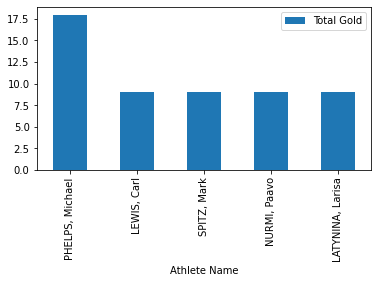

In [16]:
data = []
for Athlete in df['Athlete'].unique():
    data.append([Athlete,len(df.loc[(df['Athlete']==Athlete) & (df['Medal']=='Gold')])])
pd.DataFrame(data,columns=['Athlete Name','Total Gold']).sort_values(by='Total Gold',ascending=False).head().plot.bar(x='Athlete Name',y='Total Gold',figsize=(6,3))

**6. In which year India won first Gold Medal in Summer Olympics?**

In [17]:
dt=df[df['Country']=='IND']
dt=dt[dt['Medal']=='Gold']
dt['Year'].min()

1928

**7. Which event is most popular in terms on number of players?**

In [18]:
df['Event'].value_counts().head()

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

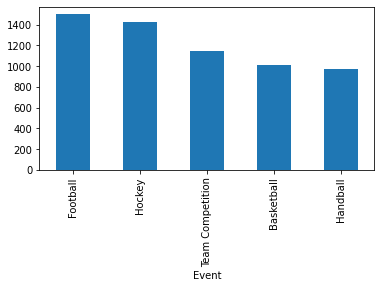

In [19]:
df.groupby("Event").count()['Athlete'].sort_values(ascending=False).head(5).plot.bar(figsize=(6,3))

**8. Which sport is having most female Gold Medalists? (Top 5)**

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb5b663ba90>, ['Medal'])

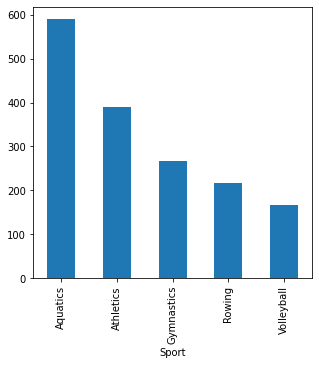

In [22]:
dt=df[df['Medal']=='Gold']
dt=dt[dt['Gender']=='Women']
dt.groupby('Sport').size().sort_values(ascending=False).head(),['Medal']
dt.groupby('Sport').size().sort_values(ascending=False).head().plot.bar(figsize=(5,5)),['Medal']